### T SNE for 100R vs 100F

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 166MB/s]


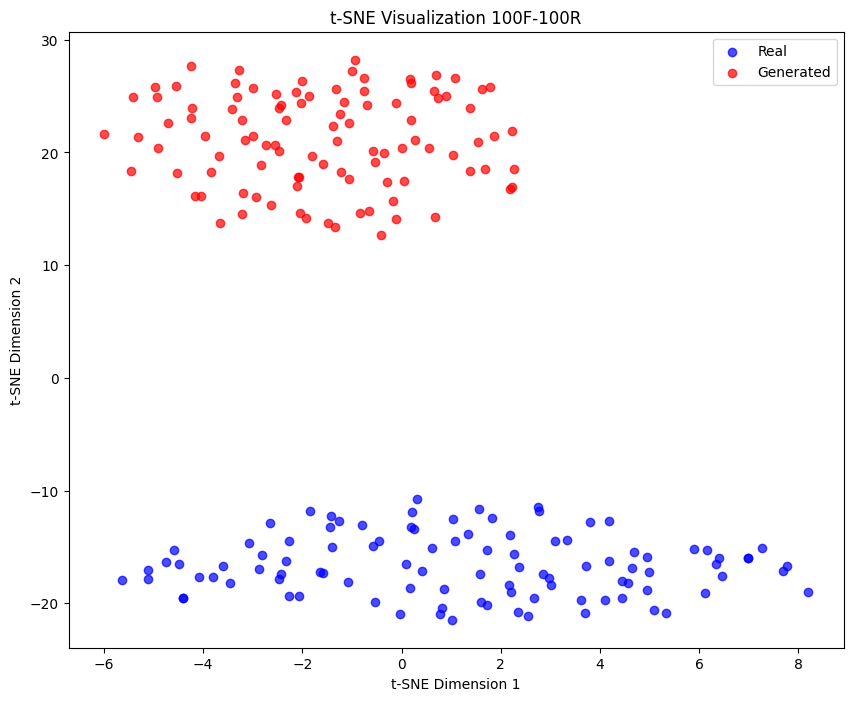

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from sklearn.manifold import TSNE

# Directories
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256"

# Seed for reproducibility
random.seed(42)

# Load 100 random images from dir1 and all 100 images from dir2
real_images = random.sample(os.listdir(dir1), 100)
generated_images = os.listdir(dir2)

# Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess images
def load_images(image_paths, directory):
    images = []
    for img_name in image_paths:
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path).convert("RGB")  # Convert grayscale to RGB
        img = transform(img)
        images.append(img)
    return torch.stack(images)

real_tensors = load_images(real_images, dir1)
generated_tensors = load_images(generated_images, dir2)

# Combine real and generated tensors
all_tensors = torch.cat((real_tensors, generated_tensors))
labels = np.array([0] * len(real_tensors) + [1] * len(generated_tensors))  # 0 for real, 1 for generated

# Feature extraction using ResNet50
model = resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer
model.eval()

with torch.no_grad():
    features = model(all_tensors).squeeze()  # Extract features and flatten

# t-SNE on extracted features
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[labels == 0, 0], features_2d[labels == 0, 1], label='Real', alpha=0.7, c='blue')
plt.scatter(features_2d[labels == 1, 0], features_2d[labels == 1, 1], label='Generated', alpha=0.7, c='red')
plt.title('t-SNE Visualization 100F-100R')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
# plt.grid()
plt.savefig("1_100f_100r.pdf", dpi=600)
plt.show()


### T SNE for 25F images from each model vs 25R images from samlet greyscale, so 25 fake images from each model (which are different from each other) while 25 are selected only once from real images directory. So all model images are TSNE with same 25 real images

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


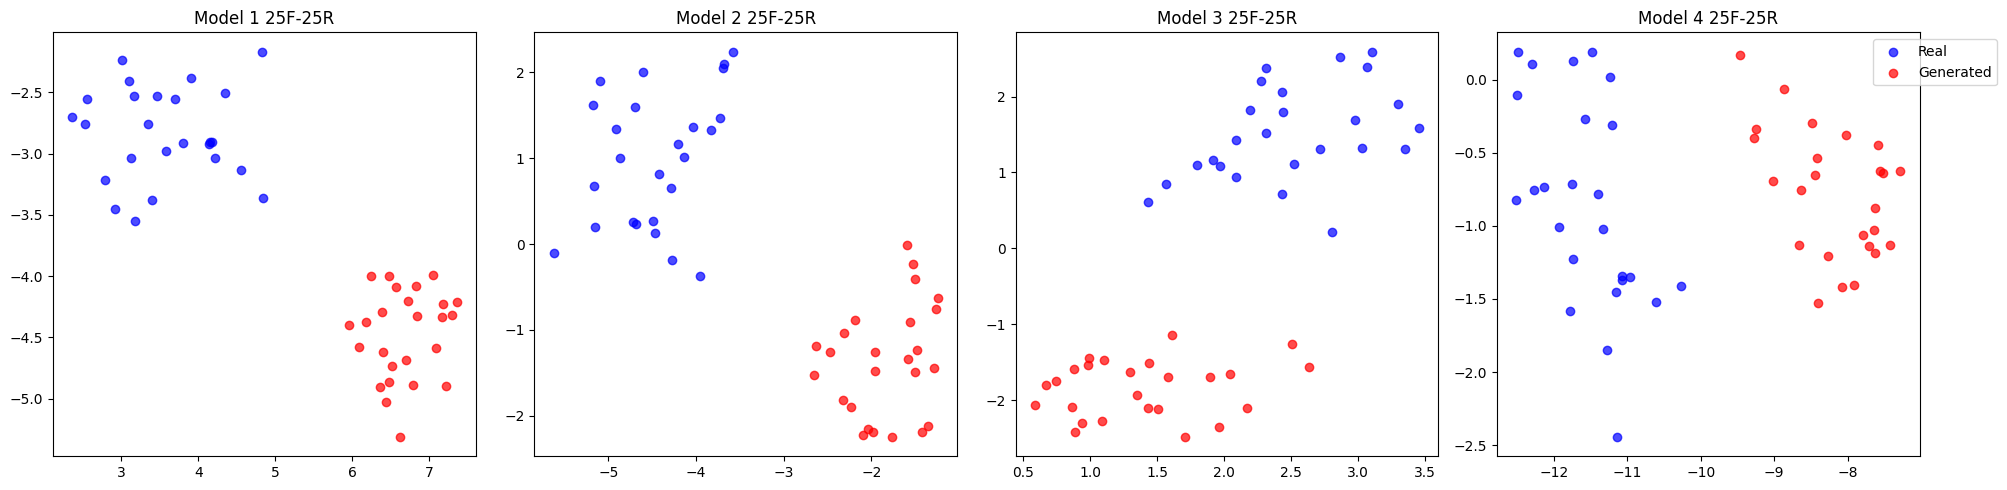

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from sklearn.manifold import TSNE

# Directories
dir1 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_1"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_2"
dir3 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_3"
dir4 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_4"
dir5 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"

# Seed for reproducibility
random.seed(42)

# Select 25 random images from dir5
real_images = random.sample(os.listdir(dir5), 25)

# Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess images
def load_images(image_paths, directory):
    images = []
    for img_name in image_paths:
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path).convert("RGB")  # Convert grayscale to RGB
        img = transform(img)
        images.append(img)
    return torch.stack(images)

real_tensors = load_images(real_images, dir5)

# Function to process one model directory and combine with real images
def process_model_and_real(model_dir, real_tensors):
    model_images = os.listdir(model_dir)
    model_tensors = load_images(model_images, model_dir)
    combined_tensors = torch.cat((real_tensors, model_tensors))
    labels = np.array([0] * len(real_tensors) + [1] * len(model_tensors))  # 0 for real, 1 for model
    return combined_tensors, labels

# Feature extraction using ResNet50
model = resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer
model.eval()

def extract_features(tensors):
    with torch.no_grad():
        features = model(tensors).squeeze()  # Extract features and flatten
    return features

# Perform t-SNE and plotting
def perform_tsne_and_plot(ax, features, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)
    ax.scatter(features_2d[labels == 0, 0], features_2d[labels == 0, 1], label='Real', alpha=0.7, c='blue')
    ax.scatter(features_2d[labels == 1, 0], features_2d[labels == 1, 1], label='Generated', alpha=0.7, c='red')
    ax.set_title(title)
    # ax.axis('off')

# Process each model directory and plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
dirs = [dir1, dir2, dir3, dir4]
titles = ['Model 1 25F-25R', 'Model 2 25F-25R', 'Model 3 25F-25R', 'Model 4 25F-25R']

for i, (directory, title) in enumerate(zip(dirs, titles)):
    tensors, labels = process_model_and_real(directory, real_tensors)
    features = extract_features(tensors)
    perform_tsne_and_plot(axes[i], features, labels, title)

plt.legend(['Real', 'Generated'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.savefig("2_25f_25r_models.pdf", dpi=600)

plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


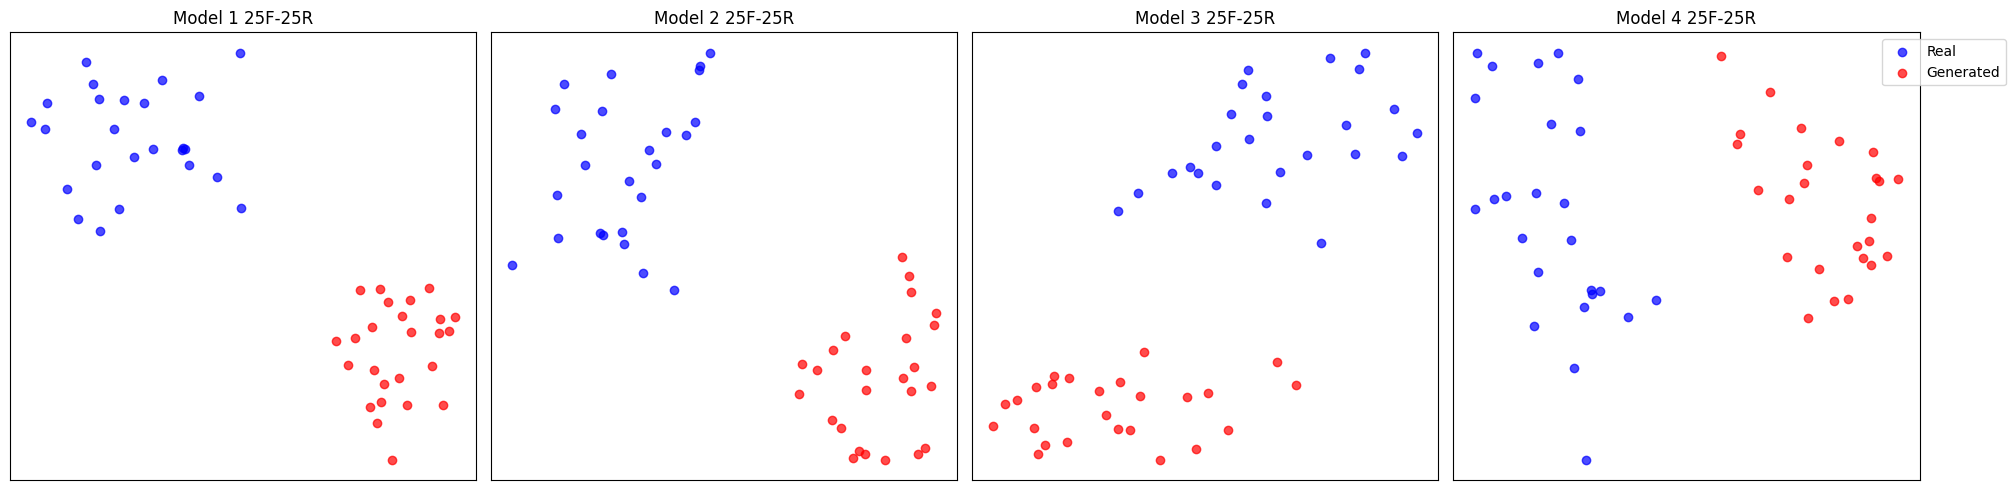

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from sklearn.manifold import TSNE

# Directories
dir1 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_1"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_2"
dir3 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_3"
dir4 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_4"
dir5 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"

# Seed for reproducibility
random.seed(42)

# Select 25 random images from dir5
real_images = random.sample(os.listdir(dir5), 25)

# Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess images
def load_images(image_paths, directory):
    images = []
    for img_name in image_paths:
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path).convert("RGB")  # Convert grayscale to RGB
        img = transform(img)
        images.append(img)
    return torch.stack(images)

real_tensors = load_images(real_images, dir5)

# Function to process one model directory and combine with real images
def process_model_and_real(model_dir, real_tensors):
    model_images = os.listdir(model_dir)
    model_tensors = load_images(model_images, model_dir)
    combined_tensors = torch.cat((real_tensors, model_tensors))
    labels = np.array([0] * len(real_tensors) + [1] * len(model_tensors))  # 0 for real, 1 for model
    return combined_tensors, labels

# Feature extraction using ResNet50
model = resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer
model.eval()

def extract_features(tensors):
    with torch.no_grad():
        features = model(tensors).squeeze()  # Extract features and flatten
    return features

# Perform t-SNE and plotting
def perform_tsne_and_plot(ax, features, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)
    ax.scatter(features_2d[labels == 0, 0], features_2d[labels == 0, 1], label='Real', alpha=0.7, c='blue')
    ax.scatter(features_2d[labels == 1, 0], features_2d[labels == 1, 1], label='Generated', alpha=0.7, c='red')
    ax.set_title(title)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks but keep outline
    # ax.axis('off')

# Process each model directory and plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
dirs = [dir1, dir2, dir3, dir4]
titles = ['Model 1 25F-25R', 'Model 2 25F-25R', 'Model 3 25F-25R', 'Model 4 25F-25R']

for i, (directory, title) in enumerate(zip(dirs, titles)):
    tensors, labels = process_model_and_real(directory, real_tensors)
    features = extract_features(tensors)
    perform_tsne_and_plot(axes[i], features, labels, title)

plt.legend(['Real', 'Generated'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.savefig("3_25f_25r_models.pdf", dpi=600)

plt.show()


### T SNE for 100R images vs another 100R images

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


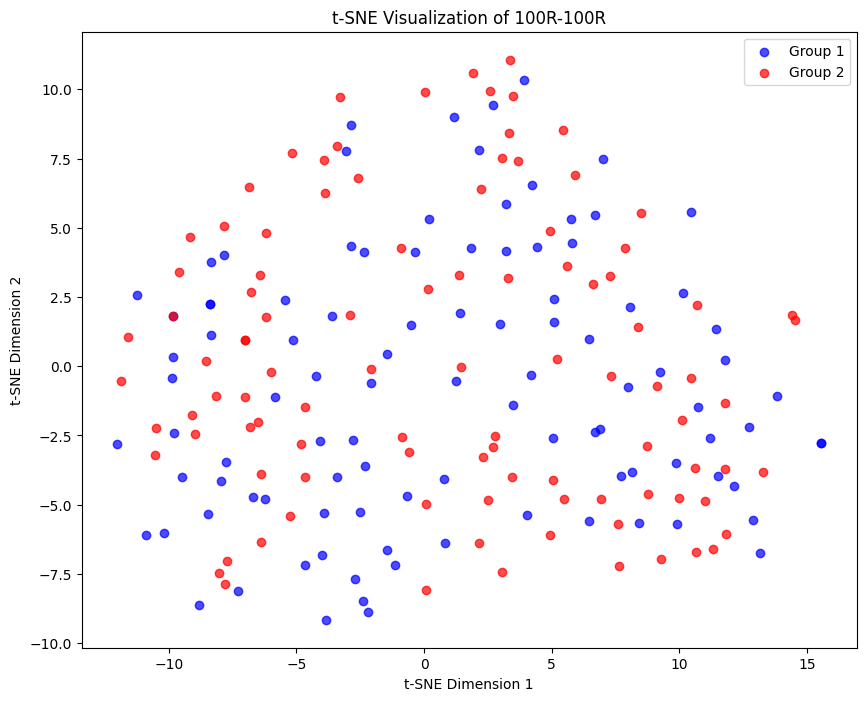

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from sklearn.manifold import TSNE

# Directory
dir5 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"

# Seed for reproducibility
random.seed(42)

# Load all images from dir5
all_images = os.listdir(dir5)

# Select 100 random images for group 1
group1_images = random.sample(all_images, 100)

# Remove group1_images from all_images and select another 100 images for group 2
remaining_images = list(set(all_images) - set(group1_images))
group2_images = random.sample(remaining_images, 100)

# Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess images
def load_images(image_paths, directory):
    images = []
    for img_name in image_paths:
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path).convert("RGB")  # Convert grayscale to RGB
        img = transform(img)
        images.append(img)
    return torch.stack(images)

group1_tensors = load_images(group1_images, dir5)
group2_tensors = load_images(group2_images, dir5)

# Combine tensors and create labels
all_tensors = torch.cat((group1_tensors, group2_tensors))
labels = np.array([0] * len(group1_tensors) + [1] * len(group2_tensors))  # 0 for group 1, 1 for group 2

# Feature extraction using ResNet50
model = resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer
model.eval()

with torch.no_grad():
    features = model(all_tensors).squeeze()  # Extract features and flatten

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[labels == 0, 0], features_2d[labels == 0, 1], label='Group 1', alpha=0.7, c='blue')
plt.scatter(features_2d[labels == 1, 0], features_2d[labels == 1, 1], label='Group 2', alpha=0.7, c='red')
plt.title('t-SNE Visualization of 100R-100R')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.savefig("4_100r_100r.pdf", dpi=600)

plt.show()


# t-SNE for 25G noise, 25R and 25F

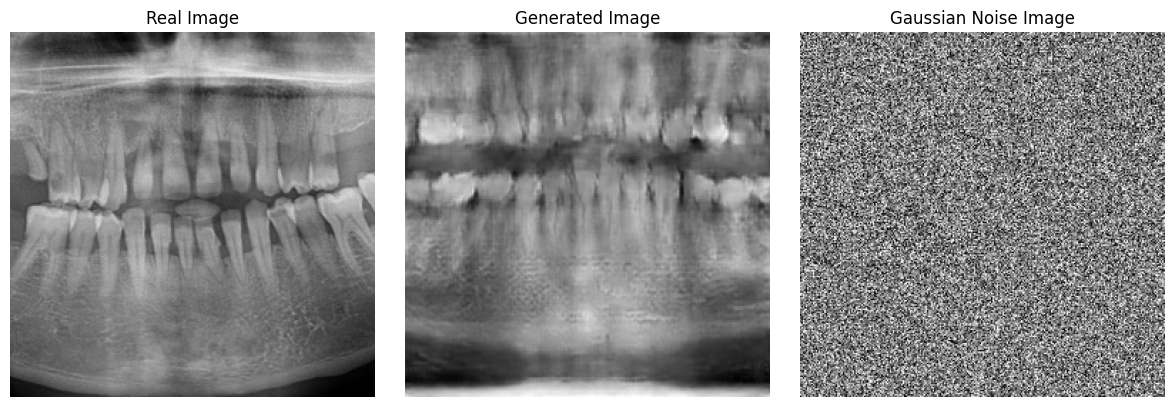

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


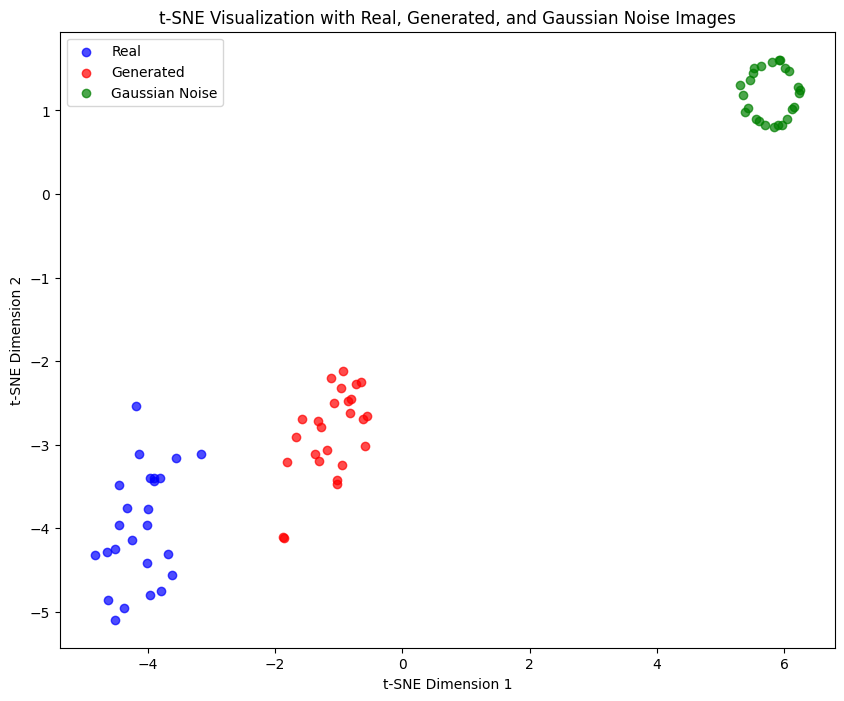

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from sklearn.manifold import TSNE

# Function to generate greyish Gaussian noise images
def generate_greyish_gaussian_noise_images(count, size=(256, 256), mean=128, std=64):
    noise_images = np.random.normal(mean, std, (count, *size)).clip(0, 255).astype(np.uint8)
    noise_images_rgb = np.stack([noise_images] * 3, axis=-1)  # Convert to RGB
    return noise_images_rgb

# Directories
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256"

# Parameters
dir1_count = 25
dir2_count = 25
gnoise_count = 25  # Number of Gaussian noise images to generate

# Seed for reproducibility
random.seed(42)

# Load `dir1_count` random images from dir1 and `dir2_count` images from dir2
real_images = random.sample(os.listdir(dir1), dir1_count)
generated_images = random.sample(os.listdir(dir2), dir2_count)
# Display one sample from each category: dir1, dir2, and Gaussian noise
def show_samples():
    # Load one random sample from dir1
    real_sample_path = os.path.join(dir1, real_images[0])
    real_sample = Image.open(real_sample_path).convert("RGB")

    # Load one random sample from dir2
    generated_sample_path = os.path.join(dir2, generated_images[0])
    generated_sample = Image.open(generated_sample_path).convert("RGB")

    # Generate one Gaussian noise sample
    gaussian_noise_sample = generate_greyish_gaussian_noise_images(1)[0]  # First image from generated noise

    # Plot samples
    plt.figure(figsize=(12, 4))

    # Real image
    plt.subplot(1, 3, 1)
    plt.imshow(real_sample)
    plt.title("Real Image")
    plt.axis("off")

    # Generated image
    plt.subplot(1, 3, 2)
    plt.imshow(generated_sample)
    plt.title("Generated Image")
    plt.axis("off")

    # Gaussian noise image
    plt.subplot(1, 3, 3)
    plt.imshow(gaussian_noise_sample)
    plt.title("Gaussian Noise Image")
    plt.axis("off")

    # Show the images
    plt.tight_layout()
    plt.savefig("sample_tsne3.pdf", dpi=600)
    plt.show()


# Call the function to display the samples
show_samples()

# Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess images
def load_images(image_paths, directory):
    images = []
    for img_name in image_paths:
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path).convert("RGB")  # Convert grayscale to RGB
        img = transform(img)
        images.append(img)
    return torch.stack(images)

real_tensors = load_images(real_images, dir1)
generated_tensors = load_images(generated_images, dir2)

# Generate Gaussian noise images
gaussian_noise_images = generate_greyish_gaussian_noise_images(gnoise_count)
gaussian_tensors = torch.stack([
    transform(Image.fromarray(img)) for img in gaussian_noise_images
])

# Combine all tensors and labels
all_tensors = torch.cat((real_tensors, generated_tensors, gaussian_tensors))
labels = np.array(
    [0] * len(real_tensors) + [1] * len(generated_tensors) + [2] * len(gaussian_tensors)
)  # 0 for real, 1 for generated, 2 for Gaussian noise

# Feature extraction using ResNet50
model = resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer
model.eval()

with torch.no_grad():
    features = model(all_tensors).squeeze()  # Extract features and flatten

# t-SNE on extracted features
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
for label, color, name in zip([0, 1, 2], ['blue', 'red', 'green'], ['Real', 'Generated', 'Gaussian Noise']):
    plt.scatter(features_2d[labels == label, 0], features_2d[labels == label, 1],
                label=name, alpha=0.7, c=color)

plt.title('t-SNE Visualization with Real, Generated, and Gaussian Noise Images')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.savefig("tsne_real_generated_gaussian.pdf", dpi=600)
plt.show()
